In [1]:
from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette
import time

In [16]:
import matplotlib.pyplot as plt
import mmcv

def getting_results_to_image(model, image, result):
    palette = [[0, 0, 0], [255, 255, 255]]
    fig_size = (12,9)
    img = model.show_result(
    image, result, palette=palette, show=False, opacity=0.5)
    plt.figure(figsize=fig_size)
    plt.imshow(mmcv.bgr2rgb(img))

In [15]:
# 2 class
config_file = '/opt/ml/final/one_seg(icnet_r18).py'
checkpoint_file = '/opt/ml/final/one_seg_Model_KJY(epoch_418).pth'

model = init_segmentor(config_file, checkpoint_file, device='cpu')

load checkpoint from local path: /opt/ml/final/one_seg_Model_KJY(epoch_418).pth


In [17]:
# icnet
from torch.autograd import profiler
import torch
# img = '/opt/ml/korea_crosswalk_afternoon.jpg'
# img='/opt/ml/htm.jpg'
# img ='/opt/ml/20200908_060000_S_14100.jpg'
# img = '/opt/ml/20200908_080001_S_29550.jpg'
# img='/opt/ml/20200907_190002_R_15150.jpg'
# img ='/opt/ml/20201004_060000-090030_S_98010.jpg'
# img = '/opt/ml/20200922_130000_300.jpg'
# img = '/opt/ml/night_crosswalk_test.png'
img='/opt/ml/KakaoTalk_20211213_152739883.jpg'
g_start = torch.cuda.Event(enable_timing=True)
g_end = torch.cuda.Event(enable_timing=True)
g_start.record()
c_start = time.time()
result = inference_segmentor(model, img)
c_end = time.time()
g_end.record()

g_inference = g_start.elapsed_time(g_end)/1000
print(f'cpu time : {(c_end-c_start)}\t using torch.cuda.Event : {g_inference}')
# print(f'cpu time : {(c_end-c_start)}')
print(result)

cpu time : 5.409757375717163	 using torch.cuda.Event : 5.41016455078125
[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])]


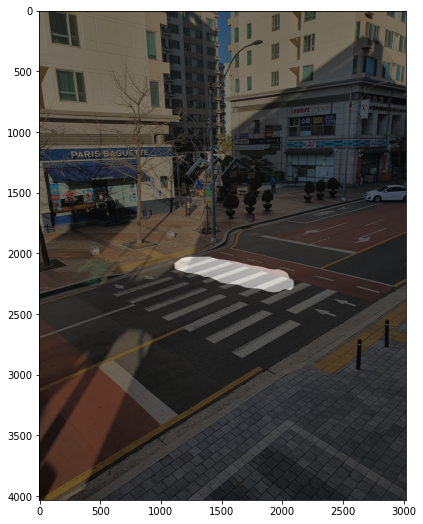

In [18]:
getting_results_to_image(model, img, result)

In [10]:
# 4 classes
config_file = '/opt/ml/final/three_seg(icnet_r18).py'
checkpoint_file = '/opt/ml/final/three_seg_Model_KJY(epoch_394).pth'

model = init_segmentor(config_file, checkpoint_file, device='cpu')

load checkpoint from local path: /opt/ml/final/three_seg_Model_KJY(epoch_394).pth


In [13]:
import matplotlib.pyplot as plt
import mmcv

def getting_results_to_image(model, image, result):
    palette = [[0, 0, 0], [255, 255, 255], [128, 0, 0], [0, 128, 0]]
    fig_size = (12,9)
    img = model.show_result(
    image, result, palette=palette, show=False, opacity=0.5)
    plt.figure(figsize=fig_size)
    plt.imshow(mmcv.bgr2rgb(img))

In [11]:
# icnet
from torch.autograd import profiler
import torch
# img = '/opt/ml/korea_crosswalk_afternoon.jpg'
# img='/opt/ml/htm.jpg'
# img ='/opt/ml/20200908_060000_S_14100.jpg'
# img = '/opt/ml/20200908_080001_S_29550.jpg'
# img='/opt/ml/20200907_190002_R_15150.jpg'
# img ='/opt/ml/20201004_060000-090030_S_98010.jpg'
# img = '/opt/ml/20200922_130000_300.jpg'
# img = '/opt/ml/night_crosswalk_test.png'
img='/opt/ml/KakaoTalk_20211213_152739883.jpg'
g_start = torch.cuda.Event(enable_timing=True)
g_end = torch.cuda.Event(enable_timing=True)
g_start.record()
c_start = time.time()
result = inference_segmentor(model, img)
c_end = time.time()
g_end.record()

g_inference = g_start.elapsed_time(g_end)/1000
print(f'cpu time : {(c_end-c_start)}\t using torch.cuda.Event : {g_inference}')
# print(f'cpu time : {(c_end-c_start)}')
print(result)

cpu time : 5.691730976104736	 using torch.cuda.Event : 5.69213623046875
[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])]


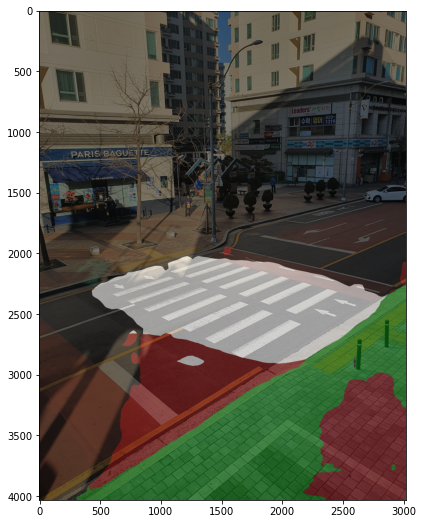

In [14]:
getting_results_to_image(model, img, result)